In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Gemini_BTCUSD_1h.csv', index_col="date", skiprows=1)
dataset.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2024-03-15 23:00:00,1710543600000,BTC/USD,69159.26,69744.76,68823.54,69500.00,9.722431,6.757090e+05
2024-03-15 22:00:00,1710540000000,BTC/USD,68302.15,69335.85,68220.93,69159.26,14.825281,1.025305e+06
2024-03-15 21:00:00,1710536400000,BTC/USD,67862.13,68309.09,67816.33,68302.15,41.146537,2.810397e+06
2024-03-15 20:00:00,1710532800000,BTC/USD,69004.39,69045.44,67450.00,67862.13,127.786525,8.671866e+06
2024-03-15 19:00:00,1710529200000,BTC/USD,70213.87,70648.97,68559.14,69004.39,322.766500,2.227231e+07


In [3]:
dataset = dataset.iloc[::-1]
dataset.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2015-10-08 13:00:00,1444309200,BTC/USD,0.00,245.00,0.00,245.00,0.606654,148.630323
2015-10-08 14:00:00,1444312800,BTC/USD,245.00,245.00,244.50,245.00,4.453649,1091.143988
2015-10-08 15:00:00,1444316400,BTC/USD,245.00,245.00,244.92,244.92,3.016926,738.905474
2015-10-08 16:00:00,1444320000,BTC/USD,244.92,244.92,244.25,244.25,3.895252,951.415413
2015-10-08 17:00:00,1444323600,BTC/USD,244.25,244.99,244.02,244.99,3.920632,960.515634


In [4]:
df = dataset.reset_index()
df

,date,unix,symbol,open,high,low,close,Volume BTC,Volume USD
0,2015-10-08 13:00:00,1444309200,BTC/USD,0.00,245.00,0.00,245.00,0.606654,1.486303e+02
1,2015-10-08 14:00:00,1444312800,BTC/USD,245.00,245.00,244.50,245.00,4.453649,1.091144e+03
2,2015-10-08 15:00:00,1444316400,BTC/USD,245.00,245.00,244.92,244.92,3.016926,7.389055e+02
3,2015-10-08 16:00:00,1444320000,BTC/USD,244.92,244.92,244.25,244.25,3.895252,9.514154e+02
4,2015-10-08 17:00:00,1444323600,BTC/USD,244.25,244.99,244.02,244.99,3.920632,9.605156e+02
...,...,...,...,...,...,...,...,...,...
73947,2024-03-15 19:00:00,1710529200000,BTC/USD,70213.87,70648.97,68559.14,69004.39,322.766500,2.227231e+07
73948,2024-03-15 20:00:00,1710532800000,BTC/USD,69004.39,69045.44,67450.00,67862.13,127.786525,8.671866e+06
73949,2024-03-15 21:00:00,1710536400000,BTC/USD,67862.13,68309.09,67816.33,68302.15,41.146537,2.810397e+06
73950,2024-03-15 22:00:00,1710540000000,BTC/USD,68302.15,69335.85,68220.93,69159.26,14.825281,1.025305e+06


In [6]:
df = df[["open", "high", "low", "close","Volume BTC"]]
df.head()

,open,high,low,close,Volume BTC
0,0.00,245.00,0.00,245.00,0.606654
1,245.00,245.00,244.50,245.00,4.453649
2,245.00,245.00,244.92,244.92,3.016926
3,244.92,244.92,244.25,244.25,3.895252
4,244.25,244.99,244.02,244.99,3.920632


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


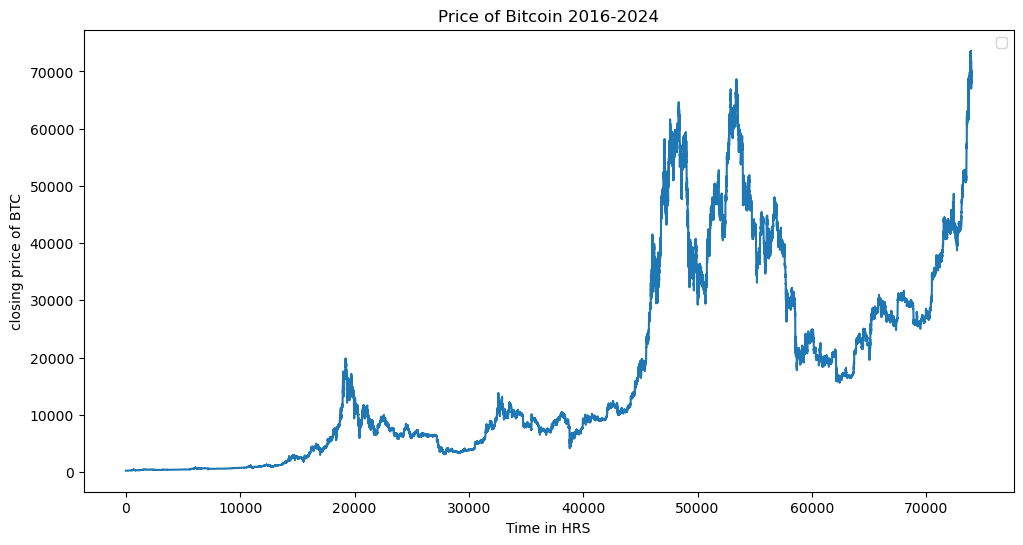

In [7]:

plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='close', data=df).set_title("Price of Bitcoin 2016-2024")
plt.xlabel('Time in HRS')
plt.ylabel('closing price of BTC')
plt.legend(loc='best');

In [8]:
SEQ_LEN = 120
FUTURE_PERIOD = 10

RATIO_TO_PREDICT = "close"

In [9]:
times = sorted(df.index.values)  # get the times
last_10 = sorted(df.index.values)[-int(0.1*len(times))] 
last_20 = sorted(df.index.values)[-int(0.2*len(times))]

test_df = df[(df.index >= last_10)]
validation_df = df[(df.index >= last_20) & (df.index < last_10)]  
train_df = df[(df.index < last_20)] 

In [10]:
train_ = train_df.values
valid_ = validation_df.values
test_ = test_df.values


In [11]:
print("train shape {0}".format(train_.shape))
print("valid shape {0}".format(valid_.shape))
print("test shape {0}".format(test_.shape))

train shape (59162, 5)
valid shape (7395, 5)
test shape (7395, 5)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_close = MinMaxScaler()

In [13]:
x = train_[:,3].copy()
scale_close.fit(x.reshape(-1, 1))

MinMaxScaler()

In [14]:
scaler.fit(train_)

train_ = scaler.transform(train_)

valid_ = scaler.transform(valid_)
test_ = scaler.transform(test_)

In [15]:
train_.shape[0]

59162

In [16]:
#Exponential moving average smoothing for smooth curve of data
EMA = 0.0
gamma = 0.165
for ti in range(train_.shape[0]):
    EMA = gamma*train_[ti] + (1-gamma)*EMA
    train_[ti] = EMA

# for visualization and test purpose
all_mid_data = np.concatenate([train_,valid_, test_],axis=0)

In [17]:
def split_data(data):
    X = []
    Y = []
    for i in range(SEQ_LEN, len(data)-FUTURE_PERIOD+1):
        X.append(data[i-SEQ_LEN:i])
        Y.append(data[i+(FUTURE_PERIOD-1), 3])
    return np.array(X), np.array(Y)

In [18]:
X_train, y_train = split_data(train_)
X_test, y_test = split_data(test_)
X_valid, y_valid = split_data(valid_)

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 5))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))

In [20]:
y_train.shape

(59033,)

In [21]:
print("train shape {0}".format(X_train.shape))
print("valid shape {0}".format(X_valid.shape))
print("test shape {0}".format(X_test.shape))

train shape (59033, 120, 5)
valid shape (7266, 120, 5)
test shape (7266, 120, 5)


In [22]:
X_train_2, y_train_2 = split_data(train_)
X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 5))

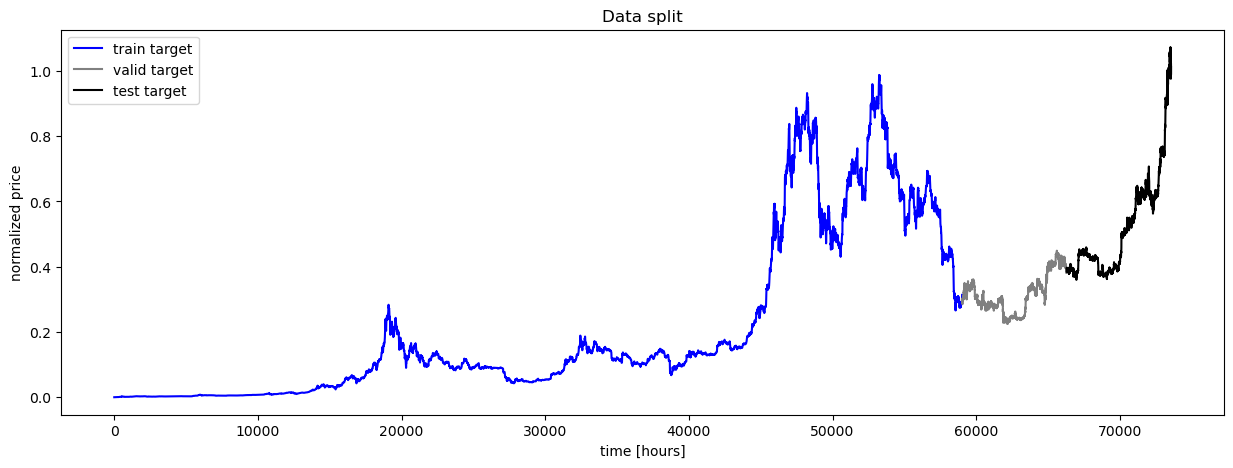

In [23]:
plt.figure(figsize=(15, 5))

plt.plot(np.arange(y_train_2.shape[0]), y_train_2, color='blue', label='train target')

plt.plot(np.arange(y_train_2.shape[0], y_train_2.shape[0]+y_valid.shape[0]), y_valid,
         color='gray', label='valid target')

plt.plot(np.arange(y_train_2.shape[0]+y_valid.shape[0],
                   y_train_2.shape[0]+y_valid.shape[0]+y_test.shape[0]),
         y_test, color='black', label='test target')


plt.title('Data split')
plt.xlabel('time [hours]')
plt.ylabel('normalized price')
plt.legend(loc='best');

Bi-LSTM MODEL

In [65]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization
from keras.layers import Bidirectional

num_units = 128
activation_function = 'relu'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 128
num_epochs = 10

# Initialize RNN
regressor2 = Sequential()

# Adding the input layer and the LSTM layer
regressor2.add(Bidirectional(LSTM(units = num_units, input_shape=(120, 5))))
regressor2.add(LeakyReLU(alpha= 0.5))
regressor2.add(BatchNormalization())
regressor2.add(Dropout(0.8))
# Adding the output layer
regressor2.add(Dense(units = 1))


In [66]:
# Compiling RNN
regressor2.compile(optimizer = optimizer, loss = loss_function, metrics = ('MAPE'))

# Using the training set to train the model
history_BiLSTM2 = regressor2.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = batch_size, epochs = num_epochs)'P[]'

Epoch 1/10
462/462 [==============================] - 169s 357ms/step - loss: 0.0935 - MAPE: 916.9049 - val_loss: 0.0099 - val_MAPE: 27.2071
Epoch 2/10
462/462 [==============================] - 178s 386ms/step - loss: 0.0037 - MAPE: 270.7276 - val_loss: 0.0011 - val_MAPE: 10.1448
Epoch 3/10
462/462 [==============================] - 187s 406ms/step - loss: 0.0036 - MAPE: 273.7032 - val_loss: 0.0012 - val_MAPE: 10.4601
Epoch 4/10
462/462 [==============================] - 190s 412ms/step - loss: 0.0031 - MAPE: 258.5519 - val_loss: 1.4765e-04 - val_MAPE: 2.8616
Epoch 5/10
462/462 [==============================] - 192s 415ms/step - loss: 0.0030 - MAPE: 273.2725 - val_loss: 0.0019 - val_MAPE: 13.4063
Epoch 6/10
462/462 [==============================] - 193s 417ms/step - loss: 0.0027 - MAPE: 256.9634 - val_loss: 0.0035 - val_MAPE: 18.3707
Epoch 7/10
462/462 [==============================] - 193s 418ms/step - loss: 0.0027 - MAPE: 260.2614 - val_loss: 9.5396e-04 - val_MAPE: 9.5896
Epoch 8

In [67]:
regressor2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_9 (Bidirecti  (None, 256)               137216    
 onal)                                                           
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_5 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_29 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 138497 (541.00 KB)
Trainable params: 13

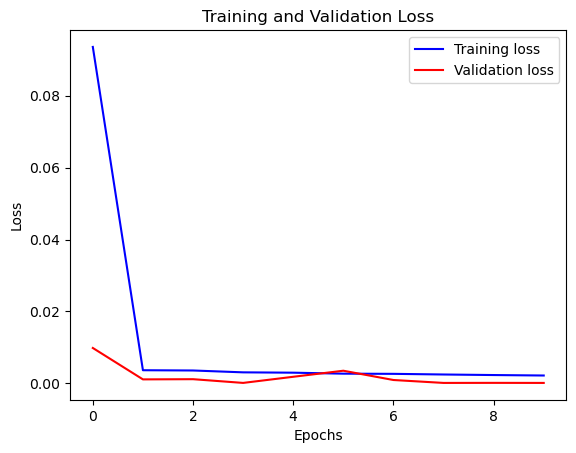

In [68]:
loss_BiLSTM2 = history_BiLSTM2.history['loss']
val_loss_BiLSTM2 = history_BiLSTM2.history['val_loss']

epochs = range(len(loss_BiLSTM2))

plt.figure()

plt.plot(epochs, loss_BiLSTM2, 'b', label='Training loss')
plt.plot(epochs, val_loss_BiLSTM2, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

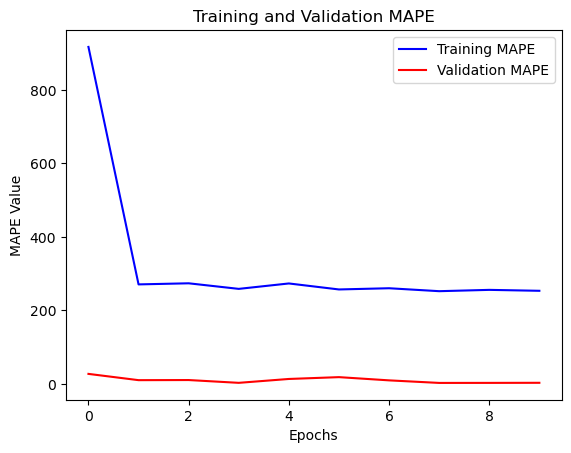

In [69]:
mape = history_BiLSTM2.history['MAPE']
val_mape = history_BiLSTM2.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAPE Value')
plt.show()

In [70]:
pred_BiLSTM2 = regressor2.predict(X_test)

228/228 [==============================] - 13s 53ms/step


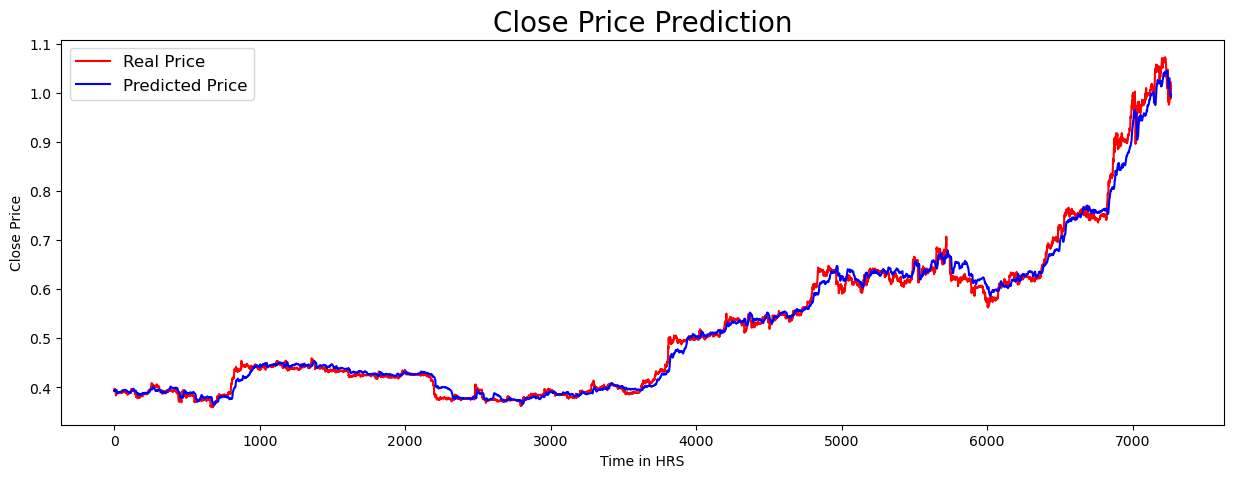

In [71]:
plt.figure(figsize=(15, 5))
plt.plot(y_test, color = 'red', label = 'Real Price')
plt.plot(pred_BiLSTM2, color = 'blue', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=20)
plt.xlabel('Time in HRS')
plt.ylabel('Close Price')
plt.legend(fontsize=12)
plt.show()

In [72]:
import math

BiLSTM2_loss = regressor2.evaluate(X_test, y_test, verbose=1)
print('\nThe error of the model with 1 layer BiLSTM is:',BiLSTM2_loss)

228/228 [==============================] - 8s 37ms/step - loss: 2.4270e-04 - MAPE: 1.8751

The error of the model with 1 layer BiLSTM is: [0.00024270036374218762, 1.8751482963562012]


LSTM MODEL

In [32]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization

# Initialize the RNN
model_LSTM1 = Sequential()
model_LSTM1.add(LSTM(units = 128, input_shape=(120, 5)))
model_LSTM1.add(LeakyReLU(alpha=0.5))
model_LSTM1.add(Dropout(0.5))
model_LSTM1.add(BatchNormalization())
model_LSTM1.add(Dense(1))
model_LSTM1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               68608     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69249 (270.50 KB)
Trainable params: 68993 (269.50 KB)
Non-trainable params: 256 (1.00 KB)
________________

In [33]:
model_LSTM1.compile(optimizer='adam', loss='mean_squared_error', metrics = ('MAPE'))

In [34]:
history_LSTM1 = model_LSTM1.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=10, batch_size=128)

Epoch 1/10
462/462 [==============================] - 74s 154ms/step - loss: 0.0251 - MAPE: 451.4157 - val_loss: 0.0077 - val_MAPE: 23.2535
Epoch 2/10
462/462 [==============================] - 72s 155ms/step - loss: 0.0019 - MAPE: 225.0233 - val_loss: 1.8925e-04 - val_MAPE: 3.6287
Epoch 3/10
462/462 [==============================] - 72s 155ms/step - loss: 0.0018 - MAPE: 225.8686 - val_loss: 8.7531e-05 - val_MAPE: 2.4270
Epoch 4/10
462/462 [==============================] - 72s 156ms/step - loss: 0.0017 - MAPE: 218.6873 - val_loss: 4.6367e-04 - val_MAPE: 6.2780
Epoch 5/10
462/462 [==============================] - 72s 155ms/step - loss: 0.0016 - MAPE: 211.0383 - val_loss: 5.0796e-05 - val_MAPE: 1.6950
Epoch 6/10
462/462 [==============================] - 72s 155ms/step - loss: 0.0014 - MAPE: 198.5630 - val_loss: 7.6124e-05 - val_MAPE: 2.4139
Epoch 7/10
462/462 [==============================] - 72s 155ms/step - loss: 0.0015 - MAPE: 214.5385 - val_loss: 1.7188e-04 - val_MAPE: 3.8809
Ep

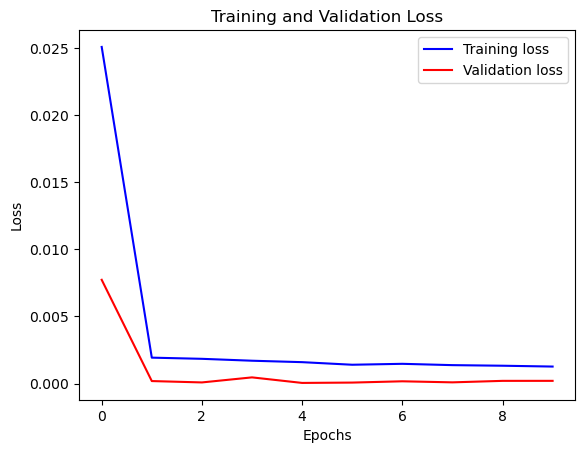

In [35]:
loss = history_LSTM1.history['loss']
val_loss = history_LSTM1.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

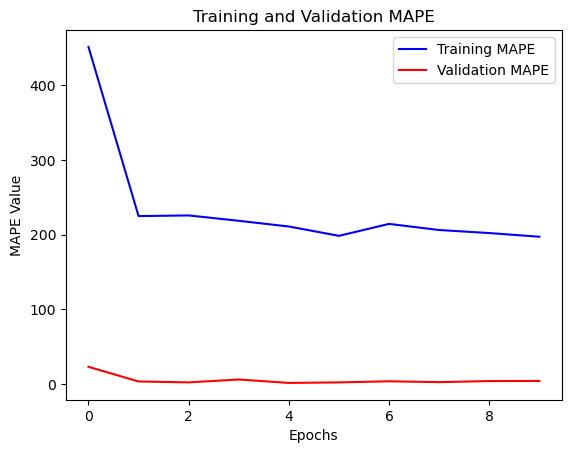

In [36]:
mape = history_LSTM1.history['MAPE']
val_mape = history_LSTM1.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAPE Value')
plt.show()

In [37]:
pred_LSTM1 = model_LSTM1.predict(X_test)
pred_LSTM1.shape
y_valid.shape

228/228 [==============================] - 6s 25ms/step


(7266,)

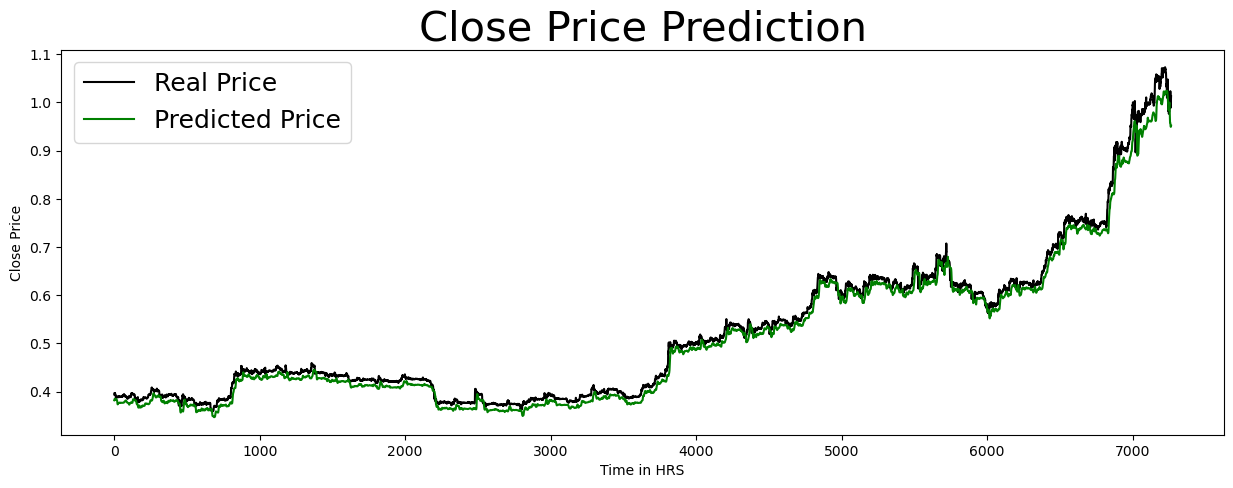

In [38]:
plt.figure(figsize=(15, 5))
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_LSTM1, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
plt.xlabel('Time in HRS')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [39]:
import math
LSTM1_loss = model_LSTM1.evaluate(X_test, y_test, verbose=1)
print('\nThe error of the model with 1 layer LSTM is:',LSTM1_loss)

228/228 [==============================] - 5s 24ms/step - loss: 3.1749e-04 - MAPE: 2.8098

The error of the model with 1 layer LSTM is: [0.0003174862067680806, 2.8097951412200928]


GRU MODEL

In [40]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.layers import GRU
import tensorflow as tf
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization

model_GRU = Sequential()

model_GRU.add(GRU(units=128, input_shape=(120,5),return_sequences=False))
model_GRU.add(Activation('LeakyReLU'))
model_GRU.add(Dropout(0.55))
model_GRU.add(BatchNormalization())
model_GRU.add(Dense(1))
model_GRU.compile(loss='mse', optimizer='adam', metrics = ('MAPE'))
model_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               51840     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 52481 (205.00 KB)
Trainable params: 52225 (204.00 KB)
Non-trainable params: 256 (1.00 KB)
________________

In [41]:
history_GRU = model_GRU.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = 128, epochs = 10)

Epoch 1/10
462/462 [==============================] - 60s 123ms/step - loss: 0.0480 - MAPE: 602.5119 - val_loss: 0.0053 - val_MAPE: 18.0776
Epoch 2/10
462/462 [==============================] - 57s 123ms/step - loss: 0.0023 - MAPE: 235.2866 - val_loss: 1.5457e-04 - val_MAPE: 3.3172
Epoch 3/10
462/462 [==============================] - 58s 125ms/step - loss: 0.0022 - MAPE: 227.3849 - val_loss: 2.4240e-04 - val_MAPE: 4.5872
Epoch 4/10
462/462 [==============================] - 58s 126ms/step - loss: 0.0022 - MAPE: 241.5984 - val_loss: 0.0015 - val_MAPE: 12.2286
Epoch 5/10
462/462 [==============================] - 59s 127ms/step - loss: 0.0021 - MAPE: 242.3074 - val_loss: 0.0018 - val_MAPE: 13.2609
Epoch 6/10
462/462 [==============================] - 58s 126ms/step - loss: 0.0020 - MAPE: 229.6154 - val_loss: 4.2780e-05 - val_MAPE: 1.5538
Epoch 7/10
462/462 [==============================] - 58s 126ms/step - loss: 0.0020 - MAPE: 239.9577 - val_loss: 1.5976e-04 - val_MAPE: 3.6938
Epoch 8/

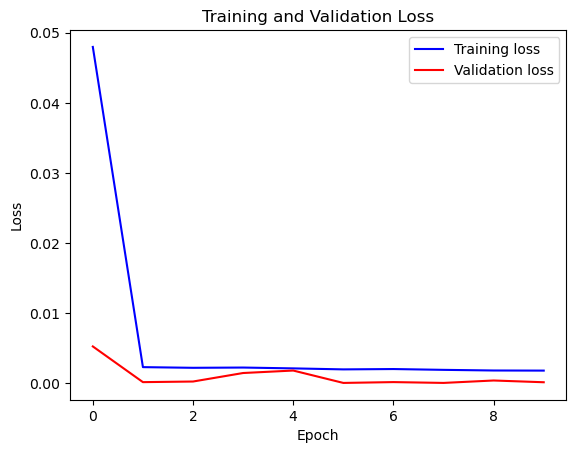

In [42]:
loss_GRU = history_GRU.history['loss']
val_loss_GRU = history_GRU.history['val_loss']

epochs = range(len(loss_GRU))

plt.figure()

plt.plot(epochs, loss_GRU, 'b', label='Training loss')
plt.plot(epochs, val_loss_GRU, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

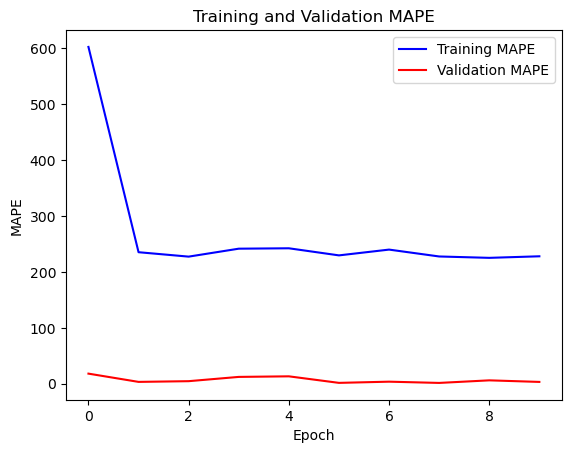

In [43]:
mape = history_GRU.history['MAPE']
val_mape = history_GRU.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.show()

In [44]:
pred_GRU = model_GRU.predict(X_test)

228/228 [==============================] - 4s 17ms/step


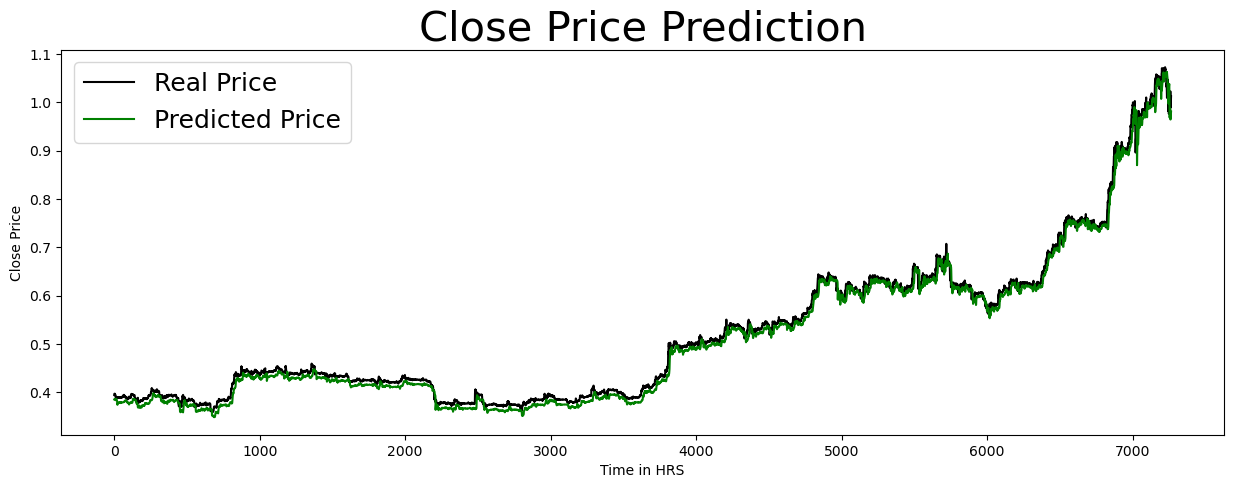

In [45]:
plt.figure(figsize=(15, 5))
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_GRU, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
plt.xlabel('Time in HRS')
plt.ylabel('Close Price')

plt.legend(fontsize=18)
plt.show()

In [46]:
import math

GRU_loss = model_GRU.evaluate(X_test, y_test, verbose=1)
print('\nThe error of the model with a GRU layer is:',GRU_loss)

228/228 [==============================] - 4s 17ms/step - loss: 1.7816e-04 - MAPE: 2.1926

The error of the model with a GRU layer is: [0.00017816276522353292, 2.1925811767578125]
